In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing 
from statsmodels.tsa.holtwinters import Holt 
from statsmodels.tsa.holtwinters import ExponentialSmoothing 
import statsmodels.formula.api as smf 

In [2]:
from google.colab import files
uploaded=files.upload()

Saving Airlines+Data.xlsx to Airlines+Data.xlsx


In [3]:
data = pd.read_excel("Airlines+Data.xlsx")

In [4]:
data

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [5]:
data.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [6]:
data.dtypes

Month         datetime64[ns]
Passengers             int64
dtype: object

#Data Visualisation

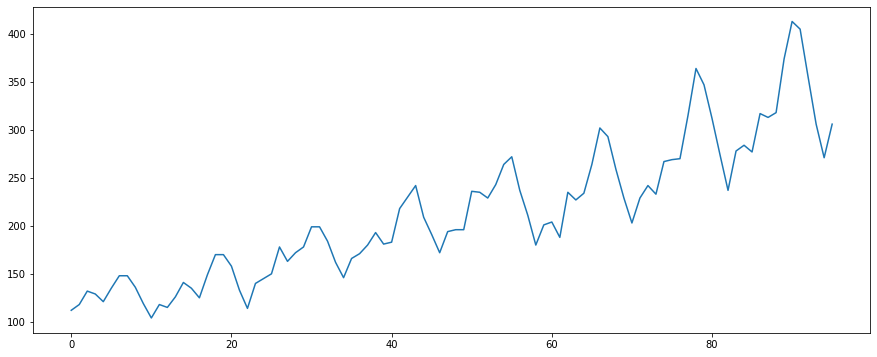

In [7]:
data['Passengers'].plot(figsize=(15, 6))
plt.show()


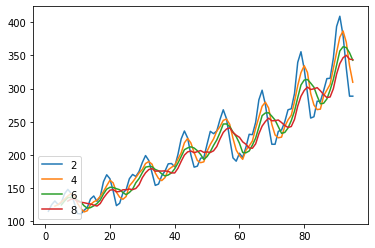

In [8]:
for i in range(2,10,2):
    data['Passengers'].rolling(i).mean().plot(label=str(i))
plt.legend(loc=3)

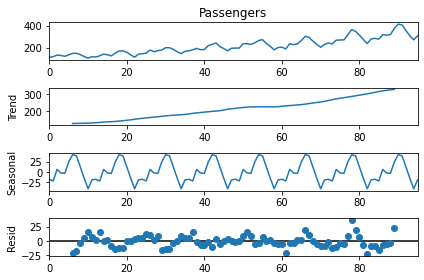

In [9]:
ts_add = seasonal_decompose(data.Passengers,model="additive",period=12)
fig = ts_add.plot()
plt.show()

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


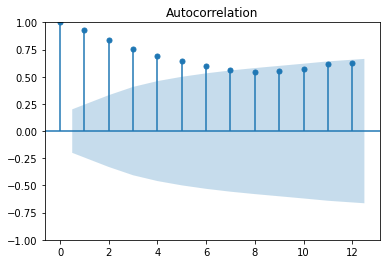

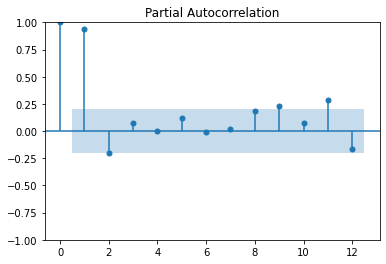

In [11]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(data.Passengers,lags=12)
tsa_plots.plot_pacf(data.Passengers,lags=12)
plt.show()

#Data Processing

In [12]:
data.count()

Month         96
Passengers    96
dtype: int64

In [13]:
data["t"]=np.arange(1,97)

In [14]:
data.head()

,Month,Passengers,t
0,1995-01-01,112,1
1,1995-02-01,118,2
2,1995-03-01,132,3
3,1995-04-01,129,4
4,1995-05-01,121,5


In [15]:
data["month"] = data.Month.dt.strftime("%b")

In [16]:
month=pd.get_dummies(data['month'])

In [17]:
data.head()

,Month,Passengers,t,month
0,1995-01-01,112,1,Jan
1,1995-02-01,118,2,Feb
2,1995-03-01,132,3,Mar
3,1995-04-01,129,4,Apr
4,1995-05-01,121,5,May


In [18]:
data1 = pd.concat([data,month],axis = 1)


In [19]:
data1.head()

,Month,Passengers,t,month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1995-01-01,112,1,Jan,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,2,Feb,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,3,Mar,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,4,Apr,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,5,May,0,0,0,0,0,0,0,0,1,0,0,0


In [20]:
data1["t_squared"] = data1["t"]*data1["t"]
data1

,Month,Passengers,t,month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t_squared
0,1995-01-01,112,1,Jan,0,0,0,0,1,0,0,0,0,0,0,0,1
1,1995-02-01,118,2,Feb,0,0,0,1,0,0,0,0,0,0,0,0,4
2,1995-03-01,132,3,Mar,0,0,0,0,0,0,0,1,0,0,0,0,9
3,1995-04-01,129,4,Apr,1,0,0,0,0,0,0,0,0,0,0,0,16
4,1995-05-01,121,5,May,0,0,0,0,0,0,0,0,1,0,0,0,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,92,Aug,0,1,0,0,0,0,0,0,0,0,0,0,8464
92,2002-09-01,355,93,Sep,0,0,0,0,0,0,0,0,0,0,0,1,8649
93,2002-10-01,306,94,Oct,0,0,0,0,0,0,0,0,0,0,1,0,8836
94,2002-11-01,271,95,Nov,0,0,0,0,0,0,0,0,0,1,0,0,9025


In [21]:
data1["log_Passengers"] = np.log(data1["Passengers"])

In [22]:
data1.head()

,Month,Passengers,t,month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t_squared,log_Passengers
0,1995-01-01,112,1,Jan,0,0,0,0,1,0,0,0,0,0,0,0,1,4.718499
1,1995-02-01,118,2,Feb,0,0,0,1,0,0,0,0,0,0,0,0,4,4.770685
2,1995-03-01,132,3,Mar,0,0,0,0,0,0,0,1,0,0,0,0,9,4.882802
3,1995-04-01,129,4,Apr,1,0,0,0,0,0,0,0,0,0,0,0,16,4.859812
4,1995-05-01,121,5,May,0,0,0,0,0,0,0,0,1,0,0,0,25,4.795791


<Axes: xlabel='month', ylabel='Passengers'>

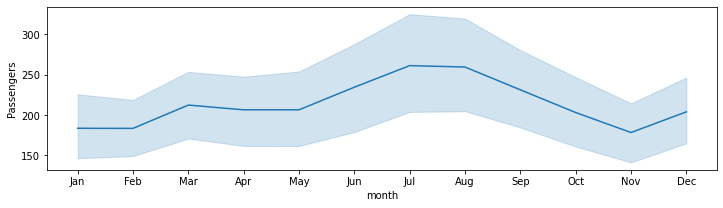

In [23]:
plt.figure(figsize=(12,3))
sns.lineplot(x="month",y="Passengers",data=data1)

#Data Splitting

In [24]:
data.count()

Month         96
Passengers    96
t             96
month         96
dtype: int64

In [25]:
Train = data1.head(80)
Test = data1.tail(16)


#Linear Model

In [26]:
linear_model = smf.ols('Passengers~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2))
rmse_linear

47.542624067726805

#Exponential Model

In [27]:
Exp = smf.ols('log_Passengers~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

43.79373939334308

#Quadratic 

In [28]:
Quad = smf.ols('Passengers~t+t_squared',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad

43.65440369584204

#Additive Seasonality

In [29]:
add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea

129.2664764144331

#Additive seasonality quadratic

In [30]:
add_sea_Quad = smf.ols('Passengers~t+t_squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_squared']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

23.910983570105426

#Multiplicative Seasonality

In [31]:
Mul_sea = smf.ols('log_Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

135.32648414621102

#multiplicative additive seasonality

In [32]:
Mul_Add_sea = smf.ols('log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea 

9.46900023030625

#Comparing the results

In [33]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
6,rmse_Mult_add_sea,9.469000
4,rmse_add_sea_quad,23.910984
2,rmse_Quad,43.654404
1,rmse_Exp,43.793739
0,rmse_linear,47.542624
3,rmse_add_sea,129.266476
5,rmse_Mult_sea,135.326484


As the Root mean square error of Multiplicative additive seasonality is less, we choose Multiplicative Additive Seasonality Model